## 학과: IT 미디어 공학과
## 학번: 20171101
## 이름(영문이름): 박경선(gyeongseon park)

## 1장 마켓과 머신러닝

### 1. 생선(도미 vs 빙어) 분류 문제

**1.1 도미 데이터 준비하기**



In [2]:
# 35마리의 도미를 준비했다.
# 도미의 특성(feature)인 길이(cm)와 무게(g)를 저울로 재서 파이썬 리스트로 만든다.
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

**1.2 도미 데이터의 산점도 (scatter plot) 그리기**

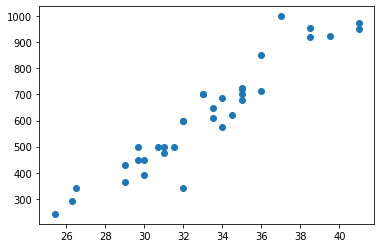

In [5]:
import matplotlib.pyplot as plt

# 산점도를 그리기 위해 scatter()에 도미의 길이와 무게를 파라미터로 준다.
plt.scatter(bream_length, bream_weight)

# xlabel()를 이용하여 x축 레이블을 지정한다.
plt.xlabel('length')
# ylabel()를 이용하여 y축 레이블을 지정한다.
plt.ylabel('weight')

# show() 함수를 이용하여 그래프를 보여준다.
plt.show()


**1.3 빙어 데이터의 산점도 그리기**
- 도미와 빙어 데이터를 함께 산점도로 그린다.

In [8]:
# 14 마리의 빙어를 준비했다.
# 빙어의 특성인 길이와 무게를 저울로 재서 파이썬 리스트로 만든다.
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

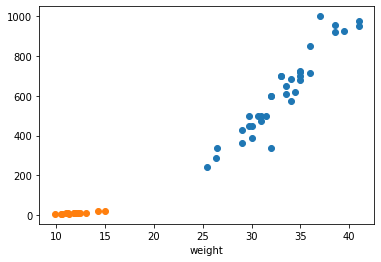

In [10]:
# 도미의 산점도를 그리기 위해 scatter()에 도미의 길이와 무게를 파라미터로 준다.
plt.scatter(bream_length, bream_weight)
# 빙어의 산점도를 그리기 위해 scatter()에 빙어의 길이와 무게를 파라미터로 준다.
plt.scatter(smelt_length, smelt_weight)

# xlabel()를 이용하여 x축 레이블을 지정한다.
plt.xlabel('length')
# ylabel()를 이용하여 y축 레이블을 지정한다.
plt.xlabel('weight')

# show() 함수를 이용하여 그래프를 보여준다.
plt.show()


**1.4 도미와 빙어 데이터 합치기**
- 2차원 리스트를 만들기 위해 zip()함수와 for문을 사용한다.

In [9]:
# 도미 리스트와 빙어 리스트를 + 연산자를 이용하여 합친다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip()는 2개의 리스트를 묶는다. 나열된 리스트 각각에서 원소를 하나씩 꺼내서 반환한다.
# for 반복문을 이용해서 묶여진 리스트에서 원소를 하나씩 꺼내 l, w 변수에 저장하고, 리스트를 만든다.
fish_data = [[l, w] for l,w in zip(length, weight)]

# 2차원 리스트를 출력한다.
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


**1.5 정답 데이터 만들기**

In [11]:
# 정답 리스트를 만들기 위해 도미와 빙어를 숫자로 1과 0으로 표현한다.
# 곱셈(*) 연산자를 사용하여 리스트의 원소를 반복시킨다.
fish_target = [1]*35 + [0]*14

# 리스트를 출력한다.
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
# sklearn.neighbors 패키지에서 k-최근점 이웃 알고리즘을 구현한 KNeighborsClassifier만 임포트한다.
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 클래스의 kn 객체를 만든다.
# ✍🏻 method는 특성상 소문자로 시작하지만 아래는 생성자 함수이기 때문에 대문자로 시작(class명과 이름이 동일!)
kn = KNeighborsClassifier()

# fit()는 규칙을 학습시키는 훈련 메서드이며 훈련데이터와 정답데이터를 매개변수로 준다.
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**1.6 k-최근접 이웃 알고리즘으로 훈련시킨다.**

In [14]:
# sklearn.neghbors 패키지에서 k-최근접 이웃 알고리즘을 구현한 KNeighborsClassifier만 임포트한다.
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 클래스의 kn 객체를 만든다.
kn = KNeighborsClassifier()

# fit()는 규칙을 학습시키는 훈련메서드이며 훈련데이터와 정답데이터를 매개변수로 준다.
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**1.7 모델을 평가한다.**

In [15]:
# score()는 모델을 평가하는 메서드이며 훈련데이터와 정답데이터를 매개변수로 준다.
kn.score(fish_data, fish_target)

1.0

**1.8 새로운 생선 예측하기**
- 새로운 생선 예측하기를 확인하기 위해 산점도를 그려본다.

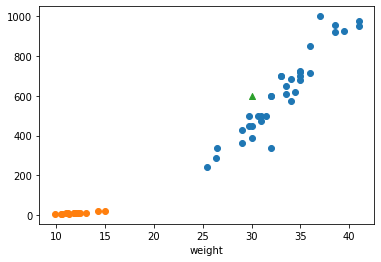

In [17]:
# 다시 산점도를 그리기 위해 scatter()에 도미데이터와 빙어데이터를 매개변수로 준다.
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

# 새로운 생선 길이(x축) 30, 무게(y축) 600 좌표에 marker 표시를 한다.
plt.scatter(30, 600, marker='^')

# x축, y축 레이블을 표시한다.
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [18]:
# predict() 메소드는 새로운 데이터의 정답을 예측한다. 결과는 1 -> 도미를 나타냄
kn.predict([[30, 600]])

array([1])